In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [ ]:
import os

# Create directories if they don't exist
os.makedirs('data', exist_ok=True)
os.makedirs('models', exist_ok=True)


In [ ]:

import numpy as np
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

#To save in data folder
np.save('data/x_train.npy', x_train)
np.save('data/y_train.npy', y_train)
np.save('data/x_test.npy', x_test)
np.save('data/y_test.npy', y_test)


In [ ]:
import numpy as np

#Loading the datasets
x_train = np.load('data/x_train.npy')
y_train = np.load('data/y_train.npy')
x_test = np.load('data/x_test.npy')
y_test = np.load('data/y_test.npy')

print("Shapes:")
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)


Shapes:
x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


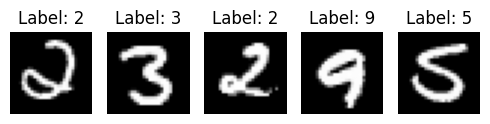

In [ ]:
import matplotlib.pyplot as plt
import random

plt.figure(figsize=(5,5))

for i in range(5):
    idx = random.randint(0, x_train.shape[0]-1)
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[idx], cmap='gray')
    plt.title(f"Label: {y_train[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:

#To Normalize pixel value
x_train = x_train / 255.0
x_test = x_test / 255.0

print('Normalization complete')


Normalization complete


Original pixel values (0 to 255):
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0 

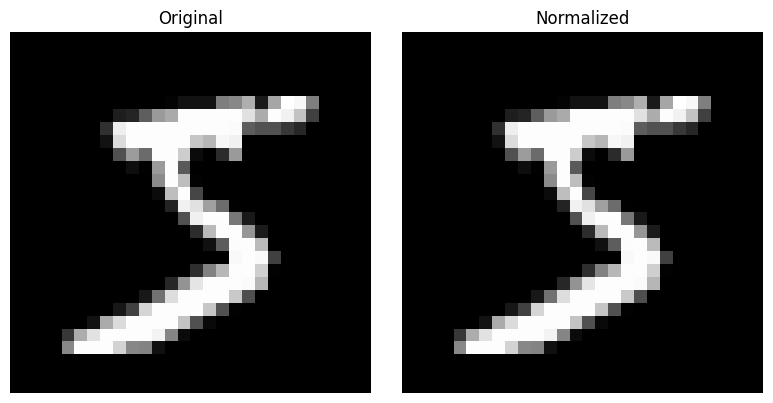

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# To pick a sample image
sample_image = np.load('data/x_train.npy')[0]

#to show original pixel values
print('Original pixel values (0 to 255):')
print(sample_image)
normalized_image = sample_image / 255.0

print("\nNormalized pixel values (0 to 1):")
print(normalized_image)

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(sample_image, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(normalized_image, cmap='gray')
plt.title("Normalized")
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
model = keras.Sequential([
    layers.Input(shape=(28, 28)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')])


In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.fit(x_train, y_train, epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8789 - loss: 0.4280
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9642 - loss: 0.1211
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9762 - loss: 0.0783
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9820 - loss: 0.0577
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9874 - loss: 0.0425


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9725 - loss: 0.0923
Test accuracy: 0.9768999814987183


In [ ]:
predictions = model.predict(x_test)

print(f"Predicted label for the first test image: {np.argmax(predictions[0])}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted label for the first test image: 7


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


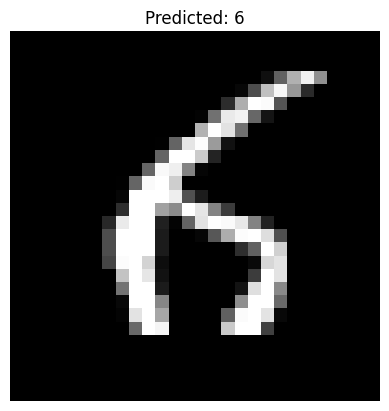

Random test image index: 1676
Predicted digit: 6


In [ ]:
#To generate a random number and show its details
import random
random_index = random.randint(0, len(x_test) - 1)

random_image = x_test[random_index]
prediction = model.predict(random_image.reshape(1, 28, 28))
predicted_label = np.argmax(prediction)

#Show the random image and the prediction
plt.imshow(random_image, cmap='gray')
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()

print(f"Random test image index: {random_index}")
print(f"Predicted digit: {predicted_label}")


In [ ]:
import os
model.save('model/image_digit_classifier.h5')
print("✅ Model saved successfully inside the 'models/' folder!")


✅ Model saved successfully inside the 'models/' folder!


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


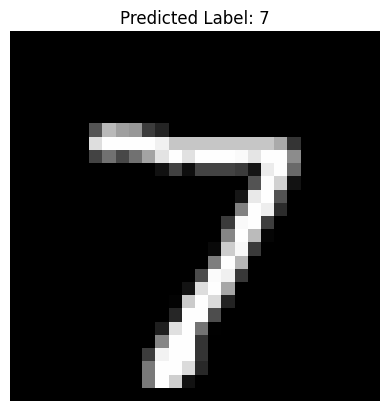

 Loaded model predicted: 7


In [ ]:
from keras.models import load_model
loaded_model = load_model('model/image_digit_classifier.h5')
loaded_predictions = loaded_model.predict(x_test)
predicted_label = np.argmax(loaded_predictions[0])

plt.imshow(x_test[0], cmap='gray')
plt.title(f"Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()

print(f" Loaded model predicted: {predicted_label}")


In [ ]:
loaded_model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[6.09223916e-09, 4.26493685e-09, 1.12464595e-05, ...,
        9.99965727e-01, 1.25188777e-07, 1.21440266e-07],
       [1.22480897e-08, 3.42023959e-05, 9.99944389e-01, ...,
        9.08825044e-13, 4.30271484e-06, 1.05225648e-12],
       [6.89389765e-07, 9.98803794e-01, 3.80608311e-04, ...,
        4.55939007e-04, 2.30187681e-04, 2.08836773e-05],
       ...,
       [1.16094927e-12, 2.43372367e-09, 5.65217187e-12, ...,
        1.21124776e-06, 4.03980891e-07, 3.09877360e-05],
       [1.03419003e-10, 1.00645636e-09, 6.45146957e-12, ...,
        4.88999008e-10, 2.86380578e-06, 1.60487665e-10],
       [2.22333441e-07, 2.25672762e-11, 1.59611560e-07, ...,
        3.87963528e-09, 1.01451256e-08, 9.62158619e-09]], dtype=float32)

In [ ]:
# 1. Import libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# 2. Load MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 3. Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

# 4. Build model
model = models.Sequential([
    layers.Input(shape=(28,28,1)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 5. Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 6. Train model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# 7. Save model
model.save('model/digit_recognizer.h5')





Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8788 - loss: 0.4294 - val_accuracy: 0.9538 - val_loss: 0.1538
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9654 - loss: 0.1199 - val_accuracy: 0.9696 - val_loss: 0.1012
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9776 - loss: 0.0767 - val_accuracy: 0.9699 - val_loss: 0.0955
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9828 - loss: 0.0564 - val_accuracy: 0.9739 - val_loss: 0.0861
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9875 - loss: 0.0409 - val_accuracy: 0.9766 - val_loss: 0.0806


In [ ]:
model.save('model/digit_recognizer.h5')


Saving Screenshot 2025-04-26 172829.png to Screenshot 2025-04-26 172829.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Predicted Digit: 3


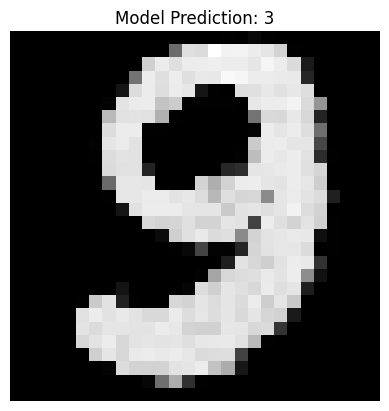

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from google.colab import files

model = load_model('model/digit_recognizer.h5')
uploaded = files.upload()

for filename in uploaded.keys():
    img_path = filename

img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
if img is None:
    print("Error: Could not read the image. Please try uploading again.")
else:
    img = cv2.resize(img, (28, 28))
    img = cv2.bitwise_not(img)
    img = img / 255.0
    img = img.reshape(1, 28, 28, 1)

    prediction = model.predict(img)
    predicted_digit = np.argmax(prediction)

    print(f"Predicted Digit: {predicted_digit}")

    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.title(f"Model Prediction: {predicted_digit}")
    plt.axis('off')
    plt.show()
